<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/ASSIGNMENT_CLASSIFICATION_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#load the libraries
import pandas as pd
import numpy as np

#data visualiztion tools
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# To read the file
df=pd.read_csv('/content/iris.csv')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [76]:
df.shape

(150, 5)

In [77]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### DATA PREPROCESSING

In [79]:
#to get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
#checking for null values
df.isnull().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification,0


In [81]:
#to view the statistics of data
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
df.dtypes

,0
SL,float64
SW,float64
PL,float64
PW,float64
Classification,object


In [83]:
#one hot encoding
df1=pd.get_dummies(df) #pd.get_dummy is used to do one hot encoding
df1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,NaN,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,NaN,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [84]:
df1.shape

(150, 7)

In [85]:
df1.dtypes

,0
SL,float64
SW,float64
PL,float64
PW,float64
Classification_Iris-setosa,bool
Classification_Iris-versicolor,bool
Classification_Iris-virginica,bool


In [86]:
#converting boolean to numbers
for columns in df1.columns:
  if df1[columns].dtype==bool:
    df1[columns]=df1[columns].astype(int)

In [87]:
df1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,NaN,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [89]:
df1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


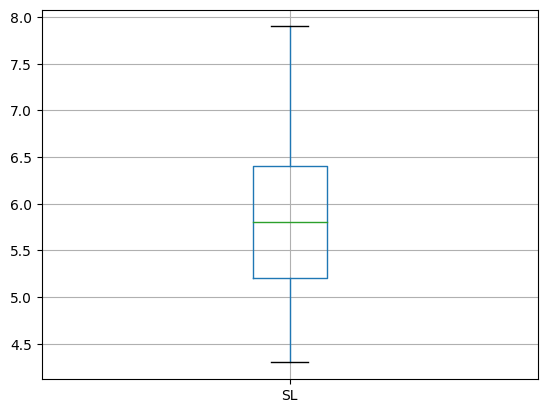

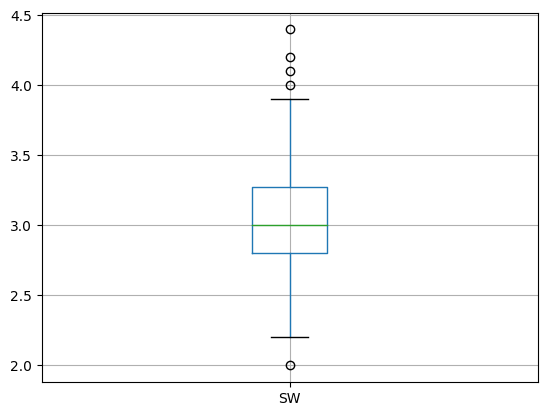

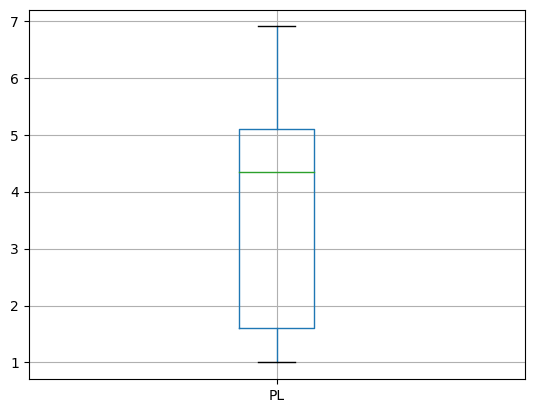

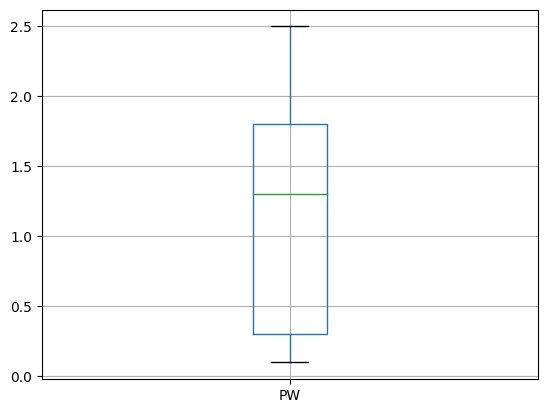

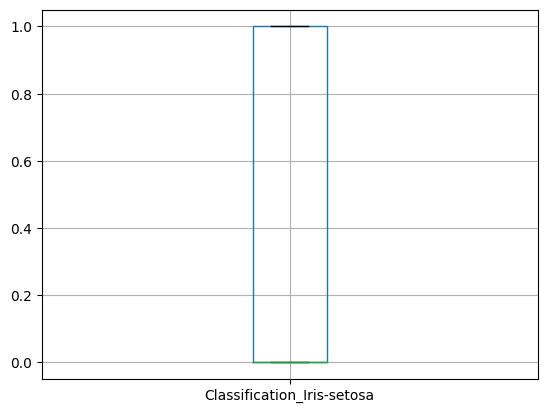

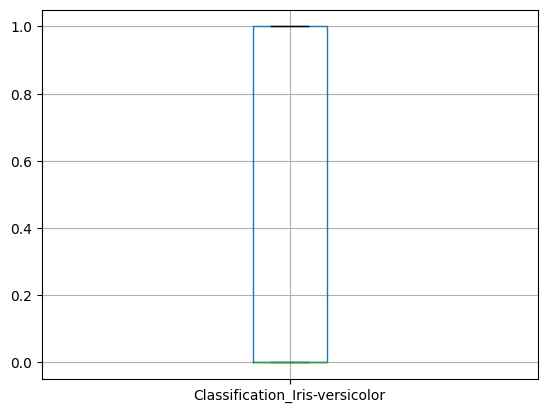

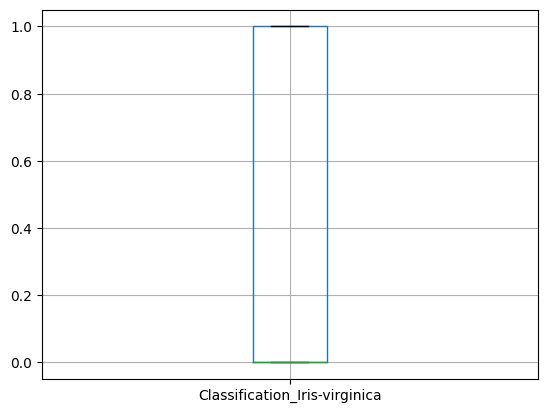

In [91]:
for col in df1.columns:
  if df1[col].dtype != 'object':
    plt.figure()
    df1.boxplot([col])
    plt.show()

In [95]:
#IQR
for col in df.columns:
  if df[col].dtype != 'object':
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1 #find IQR value for that column


    #find the upper and lower bound
    upper = Q3+1.5*IQR # find upper value
    lower = Q1-1.5*IQR #find lower value

    #df.loc[(df[col] > upper),col] = upper
    #df.loc[(df[col] < lower),col] = lower

    df1[col]=np.where(df[col]>upper,upper,df[col])
    df1[col]=np.where(df[col]<lower,lower,df[col])

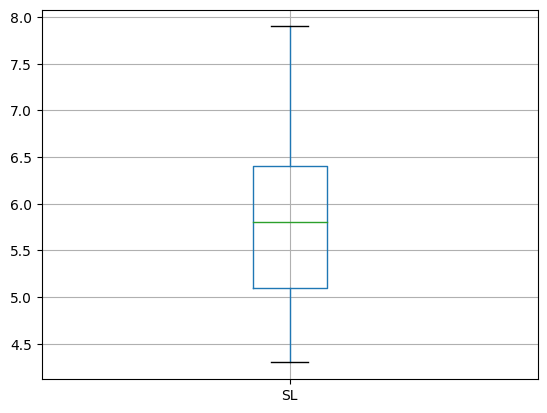

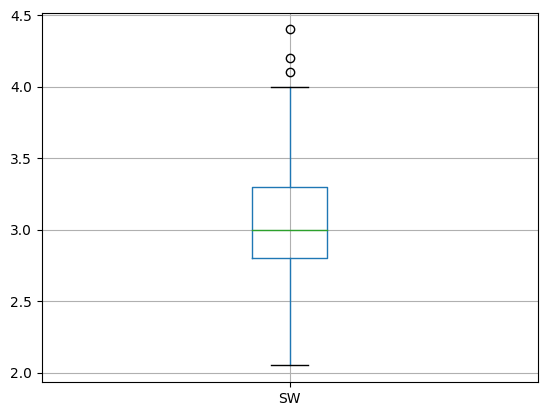

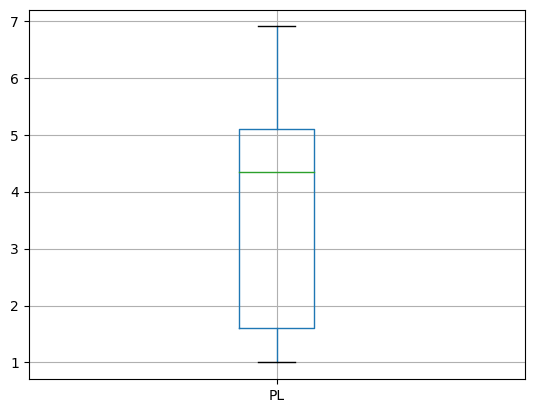

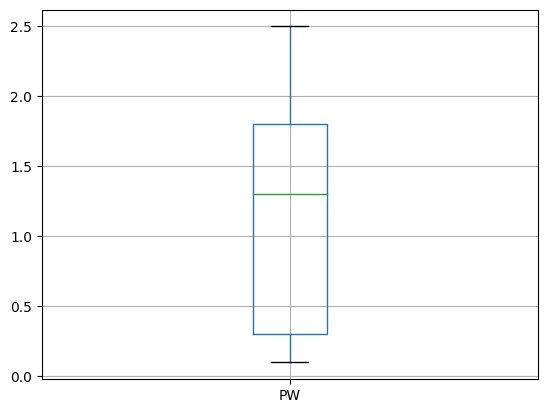

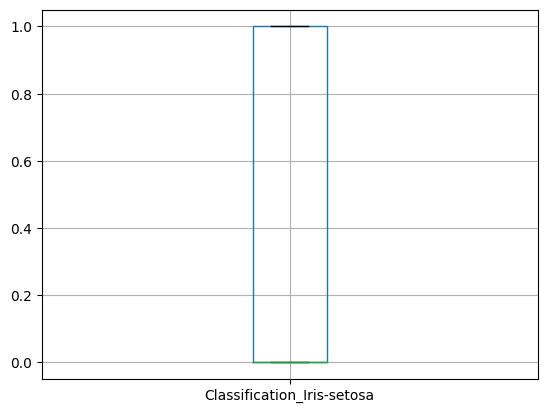

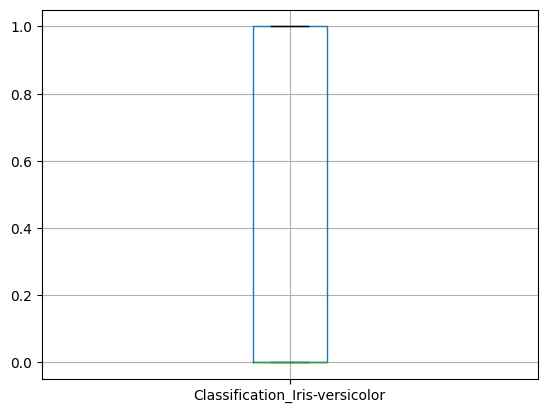

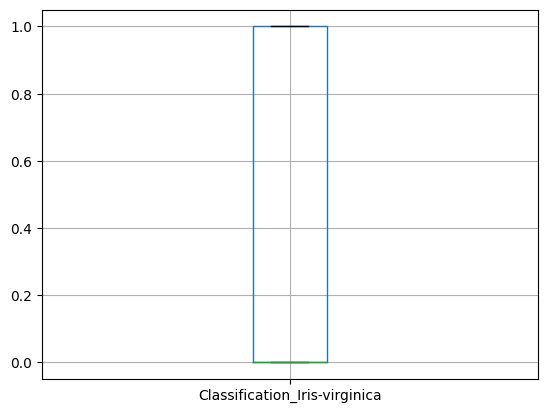

In [96]:
for col in df1.columns:
  if df1[col].dtype != 'object':
    plt.figure()
    df1.boxplot([col])
    plt.show()

In [97]:
df1.isna().sum()

,0
SL,7
SW,6
PL,6
PW,0
Classification_Iris-setosa,0
Classification_Iris-versicolor,0
Classification_Iris-virginica,0


In [98]:
df1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [122]:
df1['SL'].fillna(df1['SL'].median(),inplace=True)

In [123]:
df1['PL'].fillna(df1['PL'].median(),inplace=True)

In [124]:
df1['SW'].fillna(df1['SW'].median(),inplace=True)
df1['PW'].fillna(df1['PW'].median(),inplace=True)

In [125]:
df1.isna().sum()

,0
SL,0
SW,0
PL,0
PW,0
Classification_Iris-setosa,0
Classification_Iris-versicolor,0
Classification_Iris-virginica,0


In [126]:
df1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [127]:
df1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [128]:
y=df['Classification']
x=df.drop(['Classification'],axis=1)

In [129]:
y

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


In [130]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [131]:
df1_filled = df1.fillna(0)

In [132]:
df1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


In [133]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
x_train.shape

(120, 4)

In [135]:
x_test.shape

(30, 4)

### LOGISTIC

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
# Create an imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
x_train = imputer.fit_transform(x_train)

# Transform the test data
x_test = imputer.transform(x_test)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [143]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [144]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [145]:
y_test

,Classification
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [147]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
f1 score is 0.966750208855472


In [149]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [150]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [151]:
y_test

,Classification
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor
31,Iris-setosa
64,Iris-versicolor
141,Iris-virginica
68,Iris-versicolor
82,Iris-versicolor


In [152]:
x_train

array([[-1.53607740e+00,  1.27393812e+00, -1.60937295e+00,
        -1.30948358e+00],
       [-1.65087322e-01,  3.13286862e+00, -1.31475676e+00,
        -1.04292204e+00],
       [ 1.08126729e+00,  1.12106554e-01,  3.94017127e-01,
         2.89885679e-01],
       [-1.28680647e+00,  8.09205492e-01, -1.25583352e+00,
        -1.30948358e+00],
       [-1.78534832e+00,  3.44472867e-01,  0.00000000e+00,
        -1.30948358e+00],
       [ 5.82725446e-01, -1.28209132e+00,  7.47556552e-01,
         9.56289538e-01],
       [ 1.10698527e-15,  3.44472867e-01,  4.52940365e-01,
         4.23166451e-01],
       [-7.88264628e-01, -1.03191372e-15, -1.31475676e+00,
        -1.30948358e+00],
       [-1.03753555e+00,  1.27393812e+00, -1.37368000e+00,
        -1.30948358e+00],
       [-7.88264628e-01,  2.43576968e+00, -1.31475676e+00,
        -1.44276436e+00],
       [-4.04518603e-02, -8.17358696e-01,  8.06479790e-01,
         9.56289538e-01],
       [ 1.10698527e-15,  8.09205492e-01,  4.52940365e-01,
      

In [153]:
data = np.array([[38, 5000, 1, 0]])
prediction = logit_model.predict(data)

In [154]:
prediction

array(['Iris-setosa'], dtype=object)

### K-Nearest Neighbour(KNN)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski') #p=1 manhatten, p=2 eucledeon distance
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [156]:
metric_k

[1.0,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'Accuracy')

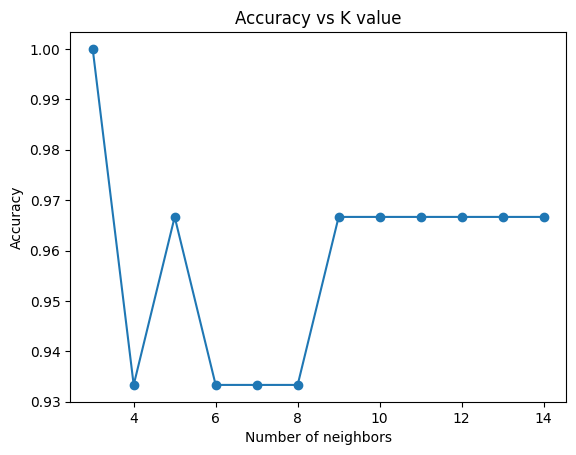

In [157]:
plt.plot(neighbors,metric_k,'o-')
plt.title('Accuracy vs K value')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [159]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=4)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [160]:
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
f1 score is 0.966750208855472


### SVM ALGORITHM

In [161]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [162]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9333333333333333
Precision is 0.9333333333333333
Recall is 0.9333333333333333
f1 score is 0.9333333333333333


###DECISION TREE

In [163]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [164]:
y_pred=dt_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
f1 score is 0.966750208855472


###RANDOM FOREST ALGORITHM

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [166]:
y_pred=rf_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
f1 score is 0.966750208855472


###HYPERPARAMETER

In [167]:
rf_clf1=RandomForestClassifier(criterion='Entropy',n_estimators=25,max_depth=10)
rf_clf1=RandomForestClassifier()
rf_clf1.fit(x_train,y_train)

RandomForestClassifier()

In [168]:
y_pred=rf_clf1.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred, average='weighted'))
print('Recall is', recall_score(y_test, y_pred, average='weighted'))
print('f1 score is', f1_score(y_test, y_pred, average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
f1 score is 0.966750208855472
